# HOMEWORK 3 
# CS584 MACHINE LEARNING 
# JULEN FERRO BAÑALES
This Jupyter Notebook will include the coding of the Homework 3 related to the subject CS584 Machine Learning, as well as some comments made.

In [403]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



Now, some basic auxiliary functions will be defined.

In [404]:

def cleaning(df):
    df = df.drop(['rightdown'], axis=1, level= 1)
    df = df.drop(['topleft'], axis=1, level= 1)
    return df

The first thing that must be done, is to read the CSV file with the location data that has been obtained after processing the mice images.

In [405]:
 
# reading the CSV file
df = pd.read_csv(r"C:\Users\ferro\Desktop\Disco Duro (17-08-2022) PRE-CHICAGO\DRIVE\University ( 28-11-2020 )\Master\Chicago IIT\Julen Subjects CHICAGO IIT\S1\CS 584 Machine Learning\Assignments\HW_3\A20512110_CollectedData_annotation.csv", header = [0, 1, 2, 3])
df = pd.DataFrame(df) 

size = os.path.getsize(r"C:\Users\ferro\Desktop\Disco Duro (17-08-2022) PRE-CHICAGO\DRIVE\University ( 28-11-2020 )\Master\Chicago IIT\Julen Subjects CHICAGO IIT\S1\CS 584 Machine Learning\Assignments\HW_3\A20512110_CollectedData_annotation.csv")

# displaying the contents of the CSV file
df.head()


scorer Unnamed: 1_level_0  \
    individuals Unnamed: 1_level_1   
      bodyparts Unnamed: 1_level_2   
         coords Unnamed: 1_level_3   
0  labeled-data               24.0   
1  labeled-data               24.0   
2  labeled-data               24.0   
3  labeled-data               24.0   
4  labeled-data               24.0   

                                  Unnamed: 2_level_0  annotation              \
                                  Unnamed: 2_level_1      mouse1               
                                  Unnamed: 2_level_2     topleft               
                                  Unnamed: 2_level_3           x           y   
0  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  273.048052   12.903231   
1  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  286.152150  140.449787   
2  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  238.977396  154.427492   
3  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  230.241331  166.657984   
4  A_male_in_a_new_cage_face_view_3_2022-08-10_15...  233.735757  173.646836   

                                                                           \
                                                                            
    rightdown                    nose                 leftear               
            x           y           x           y           x           y   
0  544.739689  331.769622  517.657886   21.639296  504.553788   51.341919   
1  516.784280  315.171098  515.910673  175.394049  488.828870  148.312246   
2  394.479362  225.189623  247.713462  212.085524  267.806412  203.349459   
3  310.613133  239.167328  287.899363  192.866180  273.048052  184.130115   
4  299.256248  261.007491  240.724609  187.624541  251.207888  191.118967   

                                                                           \
                                                                            
     rightear                 leftHip                rightHip               
            x           y           x           y           x           y   
0  464.367887   59.204378  532.509198  169.278803  481.840018  168.405197   
1  457.379034  152.680279  478.345591  234.799295  425.055592  229.557655   
2  272.174445  198.107820  300.129855  198.107820  303.624281  187.624541   
3  280.036904  196.360606  253.828707  196.360606  269.553625  210.338311   
4  258.196740  185.003721  257.323134  208.591098  287.899363  194.613393   

                                                                             \
                                                   mouse2                     
     tailBase                 tailEnd             topleft     rightdown       
            x           y           x           y       x   y         x   y   
0  462.620673  251.397819  307.118707  295.951753     NaN NaN       NaN NaN   
1  412.825100  262.754704  293.141002  285.468475     NaN NaN       NaN NaN   
2  336.821330  189.371754  404.089034  217.327164     NaN NaN       NaN NaN   
3  245.092642  221.695196  303.624281  234.799295     NaN NaN       NaN NaN   
4  281.784117  224.316016  252.955101  259.260278     NaN NaN       NaN NaN   

                                                                           \
                                                                            
  nose     leftear     rightear     leftHip     rightHip     tailBase       
     x   y       x   y        x   y       x   y        x   y        x   y   
0  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
1  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
2  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
3  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   
4  NaN NaN     NaN NaN      NaN NaN     NaN NaN      NaN NaN      NaN NaN   

               
               
  tailEnd      
        x   y  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN

 Now, the dataset will be processed in order to get the dataset structure needed to feed the Neural Network. 

In [406]:
rows = len(df) #getting the number of data examples that we have

# if we want to sample the data in order to mix it
#df = df.sample(frac = 1.00)

df = df.iloc[: , 3:]
#print(df)

#getting rid of the possible NaN values
th = 1
df = df.dropna(axis = 0)
df.fillna(value = 200.000)

rows_na = len(df)

print("\n")
print("{} rows were eliminated due to issues related to NaN values".format(rows - rows_na))
print("\n")


mouse1 = df.xs('mouse1', level=1, axis=1)
mouse1 = mouse1.dropna(axis = 0)
mouse2 = df.xs('mouse2', level=1, axis=1)
mouse2 = mouse2.dropna(axis = 0)

# print(mouse1.shape)
# print(mouse2.shape)

# print("Mouse 1")
# print(mouse1.describe)
# print("Mouse 2")
# print(mouse2.describe)


# we add as rows the mouse2 samples' data taken in pictures where more than one mice were found
#df = pd.concat([mouse1, mouse2], axis=0)
df = mouse1.append(mouse2)
#print(df)

# we create one dataset per axis with data related to its own axis
df_x = df.xs('x', level=2, axis=1)
df_y = df.xs('y', level=2, axis=1)

# we calculate the average location of the mice in both axis
x_cg = (df_x.xs('topleft', level=1, axis=1) + df_x.xs('rightdown', level=1, axis=1)) / 2
y_cg = (df_y.xs('topleft', level=1, axis=1) + df_y.xs('rightdown', level=1, axis=1)) / 2

# renaming the columns of the dataframes
x_cg.rename(columns = {'annotation':'x_location'}, inplace = True)
y_cg.rename(columns = {'annotation':'y_location'}, inplace = True)

# we get rid of the data used for calculating the average location of the mice in both axis
df = cleaning(df)
df_x = cleaning(df_x)
df_y = cleaning(df_y)

# we add to df the calculated average location of the mice in both axis
df = df.assign(x_locatin = x_cg)
df = df.assign(y_location = y_cg)

#print(df_x)
# df_x is a dataset made up of 187 rows and 7 columns corresponding to the attributes

#print(df_y)
# df_y is a dataset made up of 187 rows and 7 columns corresponding to the attributes

print(df)
# df is a dataset made up of 187 rows and 16 columns ( 7 attributes per axis + one location per axis)

#print(df.shape)



58 rows were eliminated due to issues related to NaN values


     annotation                                                              \
           nose                 leftear                rightear               
              x           y           x           y           x           y   
26   227.620511  239.167328  250.334281  214.706344  221.505265  208.591098   
27   380.501658  201.602246  364.776740  194.613393  369.144772  203.349459   
28   285.278543  200.728639  273.921658  194.613393  295.761822  194.613393   
31   320.222805  199.855033  302.750674  204.223065  322.843625  208.591098   
32   342.062969  108.126345  317.601986   95.022246  324.590838   99.390279   
35   118.419692   37.364214  155.111167   65.319624  158.605593   57.457165   
36   123.661331   23.386509  162.973626   39.111427  161.226413   24.260116   
37   466.988706  304.687819  424.181985  267.996344  431.170838  281.974049   
38   116.672479  105.505525  135.891823  112.494377  148.122315  11

In this next step, the fed datasets will be divided in training and testing datasets.

In [407]:
coef = 0.2

# x_cg and y_cg will be the respective results for the testing and training of the 7 atributes fed Neural Network
# y_2d will be the respective result for the testing and training of the 14 atributes fed Neural Network

y_2d = pd.concat([x_cg, y_cg], axis = 1)

in_x_train, in_x_test, out_x_train, out_x_test = train_test_split(df_x, x_cg, test_size = coef)
in_y_train, in_y_test, out_y_train,  out_y_test = train_test_split(df_y, y_cg, test_size = coef)
in_2d_train, in_2d_test, out_2d_train, out_2d_test = train_test_split(df['annotation'], y_2d, test_size = coef)

# just checking if the split is done properly according to the established 0.2 coefficient 

# print(in_x_test.shape)
# print(in_y_train.shape)
# print(in_2d_train.shape)
# print(in_2d_test.shape)




Now, we will print some of the useful datasets in order to see their structure before being fed to the Neural Network.

In [408]:
in_x_train.head(5)

annotation                                                              \
           nose     leftear    rightear     leftHip    rightHip    tailBase   
120  242.471822  265.185593  258.196740  343.810182  325.464445  357.787887   
50    90.464282  100.073954  107.936413  151.616741  165.594446  183.066577   
31   320.222805  302.750674  322.843625  294.888215  316.728379  303.624281   
47   200.538708  193.549855  211.021986  171.709692  207.527560  198.791495   
45    56.393627   93.958708  100.073954  111.430839  128.902971  134.144610   

                 
        tailEnd  
120  454.758214  
50   221.505265  
31   255.575921  
47   292.267396  
45   175.204118

In [409]:
out_x_train.head(5)

,x_location
120,344.246986
50,153.800757
31,302.313871
47,227.620511
45,123.661331


In [410]:
in_2d_train.head(5)

nose                 leftear                rightear              \
              x           y           x           y           x           y   
50   219.758052   86.286181  243.345429  108.999951  245.092642   86.286181   
85   383.122477  168.405197  413.698706  168.405197  403.215428  143.944213   
35   118.419692   37.364214  155.111167   65.319624  158.605593   57.457165   
125  499.312149  346.620933  550.854935  334.390442  529.888378  315.171098   
42   466.988706  312.550278  418.940346  274.111590  417.193133  284.594868   

        leftHip                rightHip                tailBase              \
              x           y           x           y           x           y   
50   265.185593  153.553885  270.427232  140.449787  294.888215  151.806672   
85   460.873460  166.657984  462.620673  145.691426  483.587231  148.312246   
35   162.973626  219.947983  160.352806  209.464705  197.917888  233.052082   
125  586.672804  318.665524  556.970181  309.929458  560.464607  294.204540   
42   301.003461  287.215688  296.635429  301.193393  240.724609  264.501918   

        tailEnd              
              x           y  
50   389.237723  159.669131  
85   540.371657  210.338311  
35   334.200510  291.583721  
125  506.301001  293.330934  
42   162.100020  201.602246

In [411]:
out_2d_train.head(5)

,x_location,y_location
50,307.118707,129.966508
85,463.494280,166.221180
35,219.321249,174.083639
125,548.670919,308.182245
42,304.934691,282.410852


Here, the first model will be ran and its name will be "THE AXIS DEPENDENT MODEL". This model is caracterized by taking the 14 attributes as input, and giving two outputs as both coordinates of the location of the mouse.

As the first step, the Neural Network model will be created by using the Tensorflow library. Then, we have to keep building up the Neural Network by establishing some other parameters, and finally, the model will be ready for the training stage. 

In [412]:
# For "THE DEPENDENT MODEL" the next datasets will be used: in_2d_train, in_2d_test, out_2d_train, out_2d_test

import tensorflow as tf

def train(df_in, df_out, neurons, output, epoch):
    
    input_shape = [df_in.shape[1]]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=neurons, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=neurons, activation='relu'),
        tf.keras.layers.Dense(units=output)
    ])
    
    # printing a summary in order to check if it works
    model.summary()

    # We will use the adam optimizer due to the fact that it behaves well overally 

    model.compile(optimizer='adam', loss='mae')
    batchs = int(rows / 30)


    losses = model.fit(
                        df_in, df_out,
                        batch_size = batchs,
                        epochs = epoch
                    )

    model.summary()

    return [model, losses]



Now that the train() function has been created, we need to create the function that will run the simulations with the different architectures.

In [413]:
def run(df_in, df_out, df_in_test, df_out_test,  neurons, output, epoch):
    results = train(df_in, df_out, neurons, output, epoch)
    model = results[0]

    pred = pd.DataFrame(model.predict(df_in_test)) 

    error = pred.values - df_out_test.values
    error = pd.DataFrame(error)
    print("Printing")
    print(error)
    
    errors = [round(abs(error.iloc[:, x].mean()), 2) for x in range(df_out_test.shape[1])]
    
    for i in range(len(errors)):
        print("The average error for the {}-axis was: ".format(i), errors[i])
    losses = results[1]
    
    # print(loss_df)
    return [errors, losses]


Now, just need to invoke the function that runs the simulations with the model parameters that we want to build and the dataset that we want to feed.

This way, we will run a while with one simulation with increasing number of neurons on each loop, until the error gets lower than a threshold. Hence, we will get the minimum neuron number per layer, for a valid a model which ensures an error upper-bounded by a threshold. 

In [414]:
output = 2

neurons = 32
epoch = 10

threshold = 0.1
err = threshold + 1.0
errores = [err, err]

while(avg_error > threshold):
    results = run(in_2d_train, out_2d_train, in_2d_test, out_2d_test, neurons, output, epoch)
    errores = results[0]
    avg_error = np.mean(np.array(errores))
    neurons += 2
    losses = results[1]

show_history(losses)
plot_history(losses)
plt.close()

print("The final model has {} neurons per hidden layer".format(neurons))

Model: "sequential_631"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1893 (Dense)          (None, 32)                480       
                                                                 
 dense_1894 (Dense)          (None, 32)                1056      
                                                                 
 dense_1895 (Dense)          (None, 2)                 66        
                                                                 
Total params: 1,602
Trainable params: 1,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27/27 [==============================] - 1s 3ms/step - loss: 160.6404
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 57.8660
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 32.2697
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 1

KeyboardInterrupt: 

Now, the second model will be ran and its name will be "THE AXIS INDEPENDENT MODEL". This model is caracterized by taking the 7 attributes as input, and giving one output as one of the coordinates of the location of the mouse. Therefore, this model will be run two times per simulation, one for x-axis and another one for the y-axis. The point of using as input the x-axis data and the y-axis separately, that is to say, in separate models, is to check the influence of x-axis values on y-axis result and viceversa.  

So, for the coordinates in x-axis we run the model.

Model: "sequential_625"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1875 (Dense)          (None, 16)                128       
                                                                 
 dense_1876 (Dense)          (None, 16)                272       
                                                                 
 dense_1877 (Dense)          (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27/27 [==============================] - 1s 2ms/step - loss: 200.9052
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 47.4413
Epoch 3/10
27/27 [==============================] - 0s 1ms/step - loss: 20.5283
Epoch 4/10
27/27 [==============================] - 0s 1ms/step - loss: 17.36

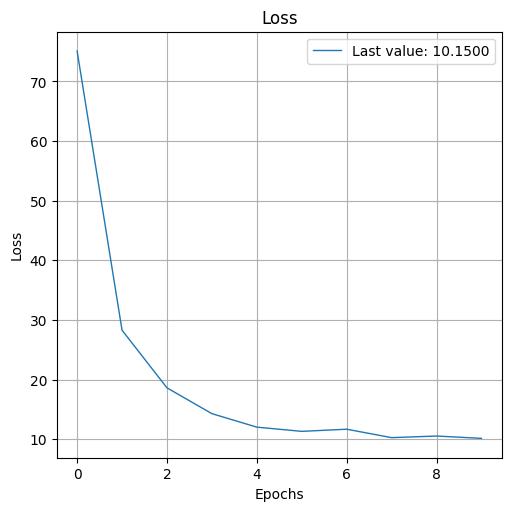

The final model has 28 neurons per hidden layer


In [ ]:

neurons = int(neurons / 2)
output = 1


while(errores[0] > threshold):
    results = run(in_x_train, out_x_train, in_x_test, out_x_test, neurons, output, epoch)
    errores = results[0]
    neurons += 2
    losses = results[1]

show_history(losses)
plot_history(losses)
plt.close()

print("The final model has {} neurons per hidden layer".format(neurons))

Noww, we run it for the coordinates in y-axis.

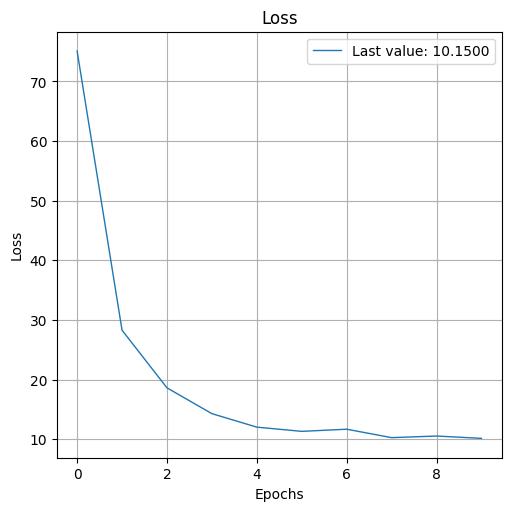

The final model has 28 neurons per hidden layer


In [ ]:
output = 1

while(errores[0] > threshold):
    results = run(in_y_train, out_y_train, in_y_test, out_y_test, neurons, output, epoch)
    errores = results[0]
    neurons += 2
    losses = results[1]

show_history(losses)
plot_history(losses)
plt.close()

print("The final model has {} neurons per hidden layer".format(neurons))